In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing

In [2]:
df = pd.read_csv('C:/Users/Sameer Kumar/Documents/Data mining & applications\week 2/vgsales.csv')

In [3]:
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [4]:
df.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [5]:
df['Year'].fillna(df['Year'].mode()[0], inplace=True)

df['Publisher'].replace(np.nan, df['Publisher'].mode()[0], inplace=True)

df.isnull().sum()

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

In [6]:
np.unique(df['Platform'])

array(['2600', '3DO', '3DS', 'DC', 'DS', 'GB', 'GBA', 'GC', 'GEN', 'GG',
       'N64', 'NES', 'NG', 'PC', 'PCFX', 'PS', 'PS2', 'PS3', 'PS4', 'PSP',
       'PSV', 'SAT', 'SCD', 'SNES', 'TG16', 'WS', 'Wii', 'WiiU', 'X360',
       'XB', 'XOne'], dtype=object)

In [7]:
df['Platform'].replace('2600', 'Atari', inplace=True)
np.unique(df['Platform'])

array(['3DO', '3DS', 'Atari', 'DC', 'DS', 'GB', 'GBA', 'GC', 'GEN', 'GG',
       'N64', 'NES', 'NG', 'PC', 'PCFX', 'PS', 'PS2', 'PS3', 'PS4', 'PSP',
       'PSV', 'SAT', 'SCD', 'SNES', 'TG16', 'WS', 'Wii', 'WiiU', 'X360',
       'XB', 'XOne'], dtype=object)

In [8]:
df = df[df.Year < 2017]
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [9]:
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns
import pandas as pd

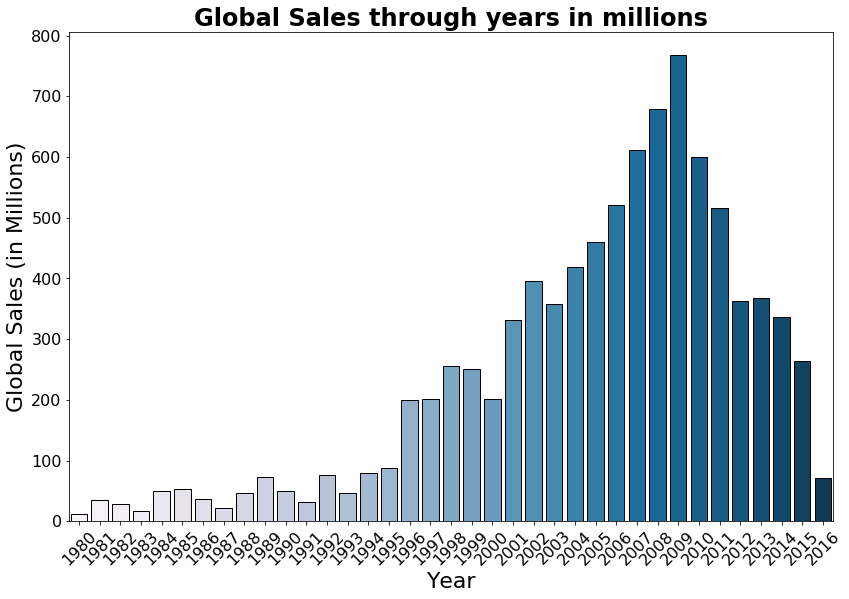

In [10]:
g_sales_over_years = df.groupby(['Year'])['Global_Sales'].sum()

box_plot_df = pd.DataFrame(columns=[str(int(i)) for i in g_sales_over_years.index])

for i in g_sales_over_years.index:
    box_plot_df.at[0, str(int(i))] = g_sales_over_years[i]

plt.figure(figsize=(13.7, 9))

sns.barplot(x='variable', y='value', data=pd.melt(box_plot_df), palette='PuBu', ec='Black')

plt.ylabel('Global Sales (in Millions)', fontsize=22)
plt.xlabel('Year', fontsize=22)
plt.title('Global Sales through years in millions', fontsize=24, fontweight='bold')
plt.xticks(rotation=45, fontsize=16)
plt.yticks(fontsize=16)
plt.show()

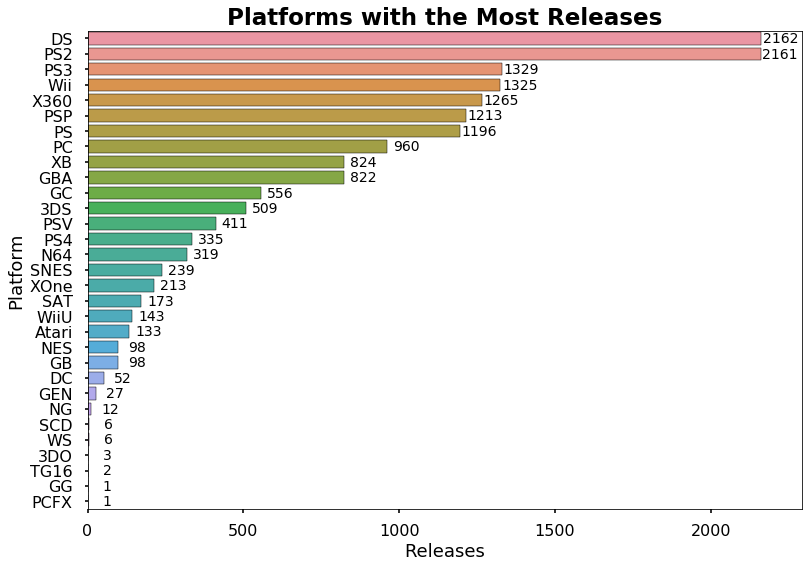

In [11]:
style.use('seaborn-poster')

f, ax = plt.subplots()
platform_releases = df['Platform'].value_counts()

sns.barplot(x=platform_releases.values, y=platform_releases.index, ec='Black')
ax.set_title('Platforms with the Most Releases', fontweight='bold', fontsize=23)
ax.set_xlabel('Releases', fontsize=18)
ax.set_xlim(0, max(platform_releases.values)+130)
ax.set_ylabel('Platform', fontsize=18)

for p in ax.patches:
    width = p.get_width()
    ax.text(width + 62,
            p.get_y() + p.get_height() / 2. + 0.28,
            int(width),
            ha="center", fontsize=14)

plt.show()

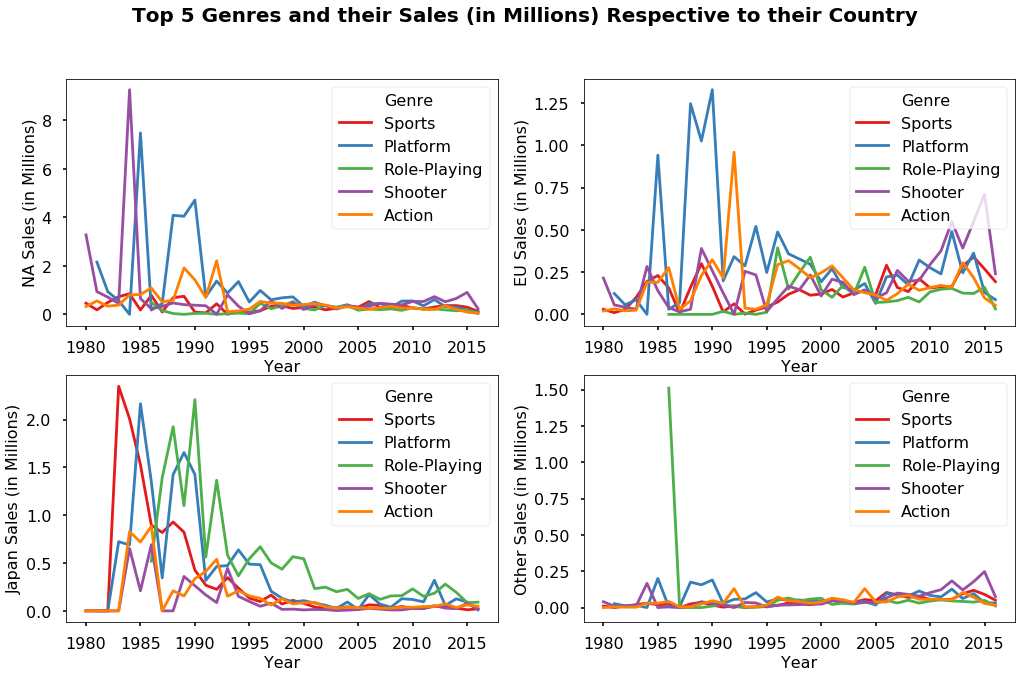

In [12]:
top5_genres_list = df.groupby(['Genre'])['Global_Sales'].sum().sort_values(ascending=False).head(5).index

top5_genre_df = df[df.Genre.isin(top5_genres_list)]
fig, (ax0,ax1) = plt.subplots(2,2, figsize=(17,10))

fig.suptitle('Top 5 Genres and their Sales (in Millions) Respective to their Country', fontsize=20, fontweight = 'bold')

sns.lineplot(x='Year', y='NA_Sales', hue='Genre', data=top5_genre_df, ci=None, ax=ax0[0], palette='Set1')

sns.lineplot(x='Year', y='EU_Sales', hue='Genre', data=top5_genre_df, ci=None, ax=ax0[1], palette='Set1')

sns.lineplot(x='Year', y='JP_Sales', hue='Genre', data=top5_genre_df, ci=None, ax=ax1[0], palette='Set1')

sns.lineplot(x='Year', y='Other_Sales', hue='Genre', data=top5_genre_df, ci=None, ax=ax1[1], palette='Set1')

ax0[0].legend(loc='upper right')
ax0[1].legend(loc='upper right')
ax1[0].legend(loc='upper right')
ax1[1].legend(loc='upper right')

ax1[1].set_ylim(-0.1,1.6)

ax0[0].set_ylabel('NA Sales (in Millions)', fontsize=16)
ax0[1].set_ylabel('EU Sales (in Millions)', fontsize=16)
ax1[0].set_ylabel('Japan Sales (in Millions)', fontsize=16)
ax1[1].set_ylabel('Other Sales (in Millions)', fontsize=16)

ax0[0].set_xlabel('Year', fontsize=16)
ax0[1].set_xlabel('Year', fontsize=16)
ax1[0].set_xlabel('Year', fontsize=16)
ax1[1].set_xlabel('Year', fontsize=16)


plt.show()


In [13]:
from sklearn.preprocessing import LabelEncoder

In [14]:
categorical_labels = ['Platform', 'Genre', 'Publisher']
numerical_lables = ['Global_Sales']
enc = LabelEncoder()
encoded_df = pd.DataFrame(columns=['Platform', 'Genre', 'Publisher', 'Global_Sales'])

for label in categorical_labels:
    temp_column = df[label]

    encoded_temp_col = enc.fit_transform(temp_column)

    encoded_df[label] = encoded_temp_col

for label in numerical_lables:
    encoded_df[label] = df[label].values

encoded_df.head()


,Platform,Genre,Publisher,Global_Sales
0,26,10,359,82.74
1,11,4,359,40.24
2,26,6,359,35.82
3,26,10,359,33.00
4,5,7,359,31.37


In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.model_selection import train_test_split

### Linear Regression with/without implementing cross validation

In [16]:
x = encoded_df.iloc[:, 0:3]
y = encoded_df.iloc[:,3:]

scalar = StandardScaler()

x = scalar.fit_transform(x)

linear_reg = LinearRegression()

linear_reg.fit(x, y)

y_pred = linear_reg.predict(x)

r2 = r2_score(y, y_pred)

print('\nLinear Regression Results without Cross Validation:')

print(f'MAE in $ (Millions): {mean_absolute_error(y_pred, y)}')

print(f'MSE in $ (Millions): {mean_squared_error(y_pred, y)}')

print(f'R2 Coeff: {r2}')


Linear Regression Results without Cross Validation:
MAE in $ (Millions): 0.58903244709908
MSE in $ (Millions): 2.4146062254789546
R2 Coeff: 0.0016084674898911855


In [17]:
linear_reg = LinearRegression()

y_pred = cross_val_predict(linear_reg, x, y, cv=5)

r2 = r2_score(y, y_pred)

print(f'MAE in Sales (Millions): {mean_absolute_error(y_pred, y)}')

print(f'MSE in Sales (Millions): {mean_squared_error(y_pred, y)}')

print(f'R2 Coeff: {r2}')

MAE in Sales (Millions): 0.737120879312106
MSE in Sales (Millions): 2.732836798587221
R2 Coeff: -0.1299735297006075


In [18]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

In [19]:
lasso = Lasso()

grid = GridSearchCV(lasso, param_grid={'alpha': range(1, 10)}, refit=True)

y_pred = cross_val_predict(grid, x, y, cv=5)

r2 = r2_score(y, y_pred)

print(f'MAE in Sales (Millions): {mean_absolute_error(y_pred, y)}')

print(f'MSE in Sales (Millions): {mean_squared_error(y_pred, y)}')

print(f'R2 Coeff: {r2}')

MAE in Sales (Millions): 0.7367908293510333
MSE in Sales (Millions): 2.7325841060965796
R2 Coeff: -0.12986904639383745


In [20]:
def linear_regression_lasso_model(x, y, scalar):
    x_train, x_test, y_train, y_test = train_test_split(x, y)

    x_train = scalar.fit_transform(x_train)
    x_test = scalar.transform(x_test)

    lasso = Lasso(alpha=1)

    lasso.fit(x_train, y_train)

    y_pred = lasso.predict(x_test)

    return {'MAE': mean_absolute_error(y_test, y_pred),
            'MSE': mean_squared_error(y_test, y_pred)}

In [21]:
lasso_result_list = list()
for i in range(0,10):
    lasso_result_list.append(linear_regression_lasso_model(x, y, scalar))

mae = list()
mse = list()

for result in lasso_result_list:
    mae.append(result['MAE'])
    mse.append(result['MSE'])

print(f'MAE in Sales (Millions): {np.mean(mae)}')
print(f'MSE in Sales (Millions): {np.mean(mse)}')
print('\nTest by Test Results:')

for counter in range(0,len(lasso_result_list)):
    print(f'Test {counter+1}:\n\tMAE: {mae[counter]}\n\tMSE: {mse[counter]}')

MAE in Sales (Millions): 0.5945185863158222
MSE in Sales (Millions): 2.77394842117304

Test by Test Results:
Test 1:
	MAE: 0.5761237301441356
	MSE: 1.6670831630211838
Test 2:
	MAE: 0.6182492755543044
	MSE: 4.201773728956827
Test 3:
	MAE: 0.5895426681931711
	MSE: 1.9176964298730867
Test 4:
	MAE: 0.5766084195381346
	MSE: 1.9252974056427825
Test 5:
	MAE: 0.5881769106798279
	MSE: 3.255442328603423
Test 6:
	MAE: 0.5936401595799536
	MSE: 2.3104252162930687
Test 7:
	MAE: 0.611027300164106
	MSE: 3.647094227059599
Test 8:
	MAE: 0.5915355827874511
	MSE: 3.5309410688608147
Test 9:
	MAE: 0.5915804657388145
	MSE: 1.8805584294375448
Test 10:
	MAE: 0.6087013507783247
	MSE: 3.403172213982069
